# Assignment-2 | Part-2 | Question-1

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

# Gridworld dimensions
grid_size = 5

# Discount factor
gamma = 0.95

# exploration factor
epsilon=0.9

# Initialize the value function
V = np.zeros((grid_size, grid_size))

# Define the actions
actions = ['up', 'down', 'left', 'right']
action_probs = [0.25, 0.25, 0.25, 0.25]

# Define the special states and their effects
special_states = {
    (0, 1): (4, 2, 5),
    (0, 4): [(4, 4, 2.5, 0.5), (4, 2, 2.5, 0.5)]
}

# Returen next S' and R(t+1) once St and At is given
def get_next_state_and_reward(state, action):
    if state in special_states:
        if state == (0, 4):
            next_state = special_states[state][np.random.choice([0, 1], p=[0.5, 0.5])]
            return (next_state[0], next_state[1]), next_state[2]
        return special_states[state][:2], special_states[state][2]

    x, y = state
    if action == 'up':
        x = max(x - 1, 0)
    elif action == 'down':
        x = min(x + 1, grid_size - 1)
    elif action == 'left':
        y = max(y - 1, 0)
    elif action == 'right':
        y = min(y + 1, grid_size - 1)

    # reward is -0.2 for normal stps, -0.5 for attempts to step off the grid
    reward = 0
    if (x, y) == state:  # Attempt to step off the grid
        reward = -0.5
    elif (x,y)== [4, 0]:
        reward = 0      # Terminal points
    elif (x,y)== [2, 4]:
        reward = 0      # Terminal points
    else:
        reward = -0.2   # Normal step
    return (x, y), reward

# Random starting except terminal points
def Random_start():
    while True:
        start=(random.randint(0,4),random.randint(0,4))
        if(start!=(4,0) and start!=(2,4)):
            return start

# generate total episode        
def generate_episode(start):
    episode = []
    state = start
    while True:
        action = random.choice(actions)
        next_state, reward = get_next_state_and_reward(state, action)
        episode.append((state, action, reward))
        state = next_state
        if state==(4,0) or state==(2,4):
            break
    return episode

# choose action on soft policy
def choose_action(state, policy):
        action_probabilities = list(policy[state].values())
        actions = list(policy[state].keys())
        return np.random.choice(actions, p=action_probabilities)

# generate total episode for epsilon soft       
def generate_episode_soft(start,policy):
    episode = []
    state = start
    while True:
        action = choose_action(state,policy)
        next_state, reward = get_next_state_and_reward(state, action)
        episode.append((state, action, reward))
        state = next_state
        if state==(4,0) or state==(2,4):
            break
    return episode


In [13]:
# Function to plot the gridworld
def plot_gridworld(policy,Title):
    grid_size = 5
    fig, ax = plt.subplots(figsize=(8, 8))

    rect1 = plt.Rectangle((0.5,-0.5), 1, 1, facecolor='blue', edgecolor='black')
    ax.add_patch(rect1)
    rect2 = plt.Rectangle((3.5,-0.5), 1, 1, facecolor='green', edgecolor='black')
    ax.add_patch(rect2)
    rect3 = plt.Rectangle((1.5,3.5), 1, 1, facecolor='red', edgecolor='black')
    ax.add_patch(rect3)
    rect4 = plt.Rectangle((3.5,3.5), 1, 1, facecolor='yellow', edgecolor='black')
    ax.add_patch(rect4)
    rect5 = plt.Rectangle((-0.5,3.5), 1, 1, facecolor='gray', edgecolor='black')
    ax.add_patch(rect5)
    rect6 = plt.Rectangle((3.5,1.5), 1, 1, facecolor='gray', edgecolor='black')
    ax.add_patch(rect6)

    for i in range(grid_size):
        for j in range(grid_size):
            # ax.text(j, i, round(policy[i,j],2), ha='center', va='center', fontsize=8)
            ax.text(j, i, policy[i,j], ha='center', va='center', fontsize=8)

    
    ax.set_xticks(np.arange(grid_size))
    ax.set_yticks(np.arange(grid_size))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(which='both')
    ax.set_xticks(np.arange(-0.5, grid_size, 1), minor=False)
    ax.set_yticks(np.arange(-0.5, grid_size, 1), minor=False)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
    plt.title(Title)
    plt.gca().invert_yaxis()
    plt.show()

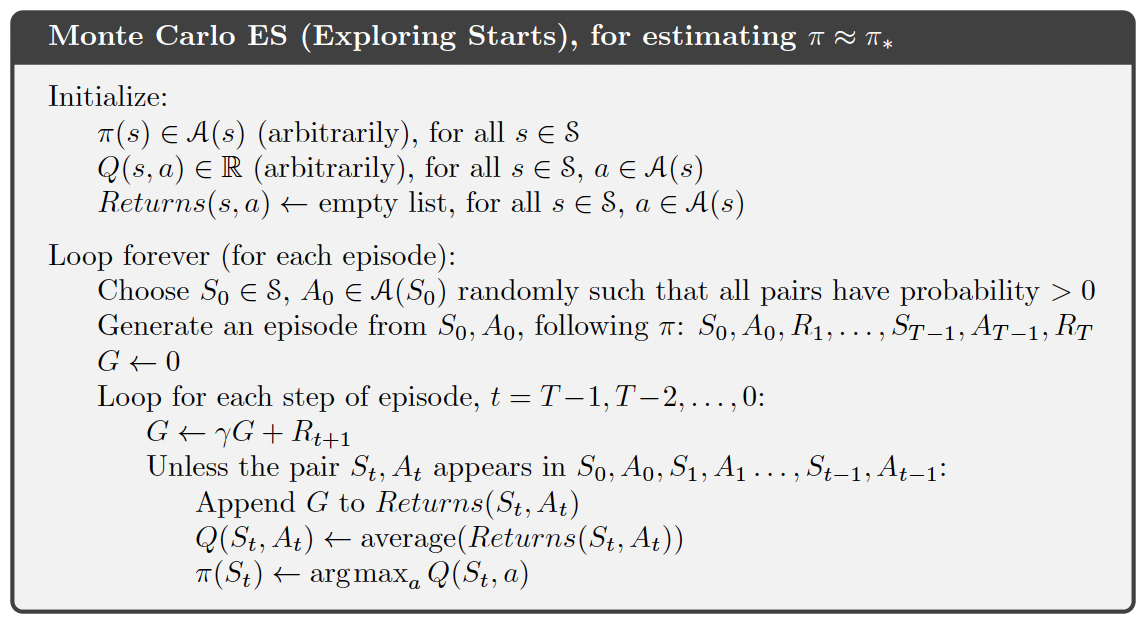

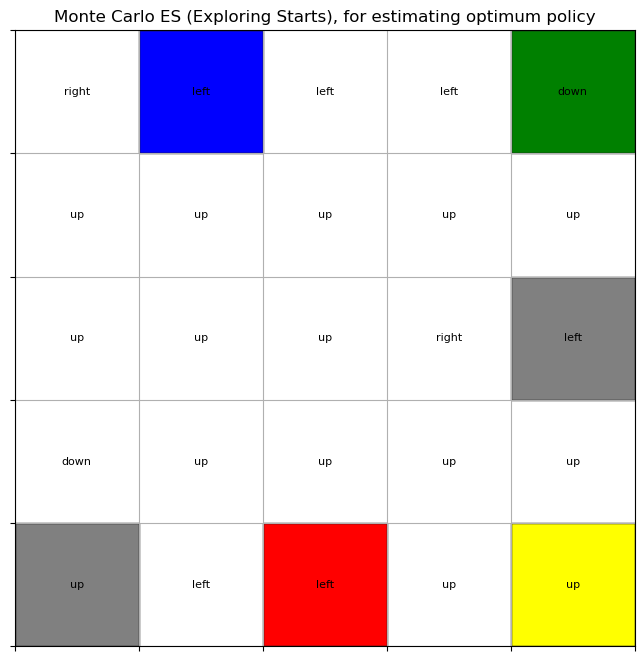

In [14]:
# MC with exploring starts
# Initialize
Q={}
returns={}
policy={}
for y in range(grid_size):
    for x in range(grid_size):
        state = (y, x)
        returns[state] = {a: [] for a in actions}
        Q[state] = {a: 0 for a in actions}
        policy[state] = random.choice(actions)

# Loop forever (for each episode)
for _ in range(1000):
    start=Random_start()
    episodes=generate_episode(start)
    G=0
    k=0
    for state, action, reward in reversed(episodes):
        G = gamma * G + reward
        if (state, action) not in [(x[0], x[1]) for x in episodes[:-(k+1)]]:
            returns[state][action].append(G)
            Q[state][action] = np.mean(returns[state][action])
            policy[state] = max(Q[state], key=Q[state].get)
        k+=1

# Print optimum policy
OA=np.full((grid_size, grid_size), "", dtype=object)
for x in range(grid_size):
    for y in range(grid_size):
        OA[x, y] = policy[x, y]
plot_gridworld(OA,"Monte Carlo ES (Exploring Starts), for estimating optimum policy")

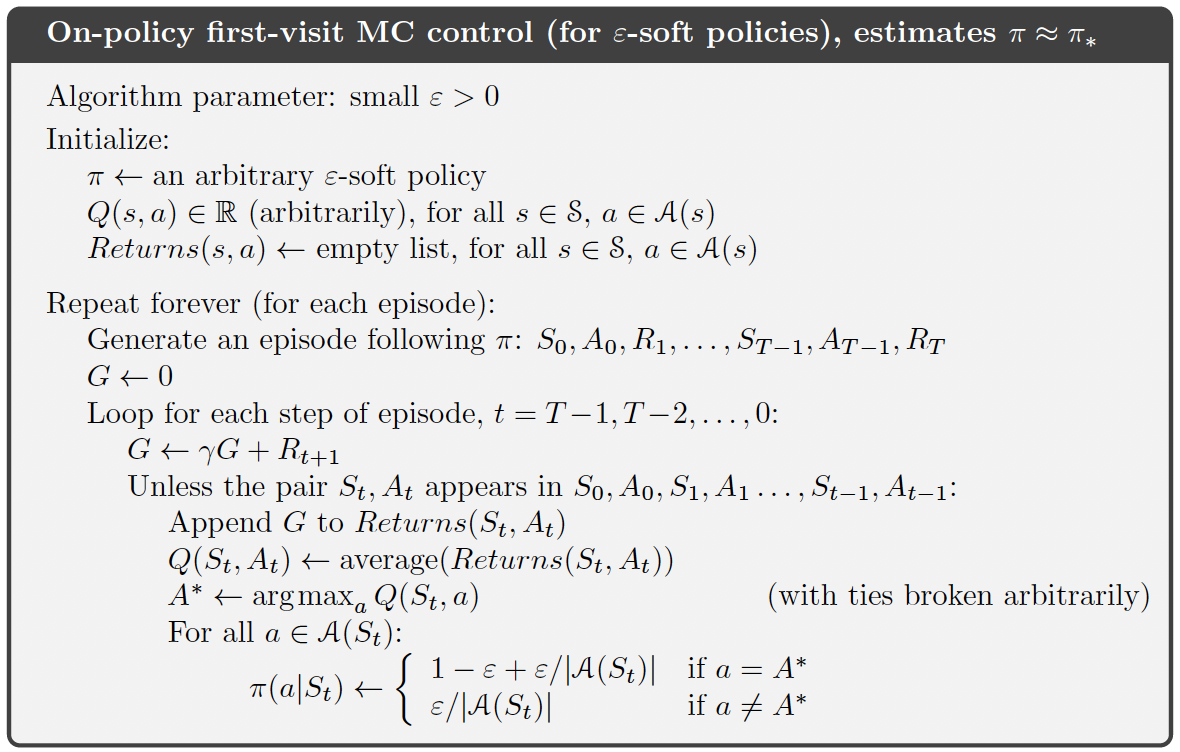

Episodes: 100%|██████████| 1000/1000 [00:00<00:00, 2467.89it/s]


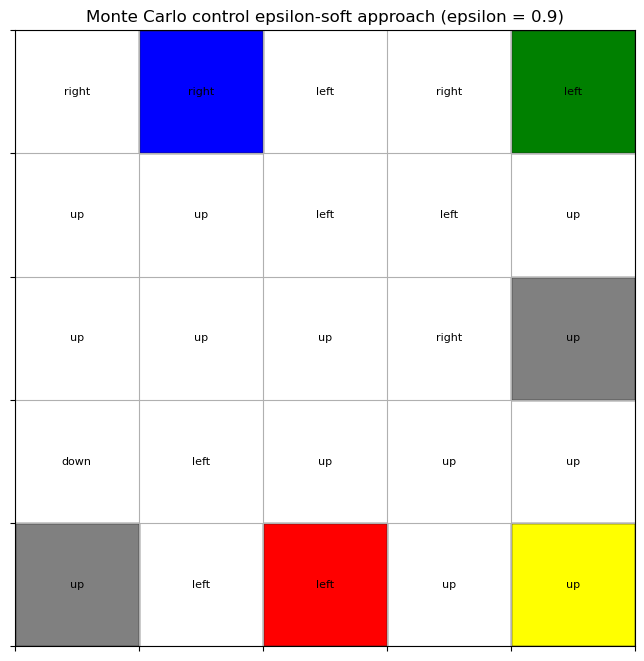

In [15]:
# MC witout exploring start but with epsilon-soft approach
# Initialize
Q={}
returns={}
policy={}
A_star={}
optimum_policy={}
for y in range(grid_size):
    for x in range(grid_size):
        state = (y, x)
        returns[state] = {a: [] for a in actions}
        Q[state] = {a: 0 for a in actions}
        policy[state]={a: 1/len(actions) for a in actions}

# Loop forever (for each episode)
for _ in tqdm(range(1000), desc="Episodes"):
    start=Random_start()
    episodes=generate_episode_soft(start,policy)
    G=0
    k=0
    for state, action, reward in reversed(episodes):
        G = gamma * G + reward
        if (state, action) not in [(x[0], x[1]) for x in episodes[:-(k+1)]]:
            returns[state][action].append(G)
            Q[state][action] = np.mean(returns[state][action])
            A_star[state] = max(Q[state], key=Q[state].get)
            for a in actions:
                if a==A_star[state]:
                    policy[state][a] = 1 - epsilon + epsilon/len(actions)
                else:
                    policy[state][a] = epsilon/len(actions)
        k+=1
# Calculate optimum policy
for y in range(grid_size):
    for x in range(grid_size):
        optimum_policy[x,y] = max(policy[x,y], key=policy[x,y].get)

# Plot optimum policy
OA=np.full((grid_size, grid_size), "", dtype=object)
for x in range(grid_size):
    for y in range(grid_size):
        OA[x, y] = optimum_policy[x, y]
plot_gridworld(OA,"Monte Carlo control epsilon-soft approach (epsilon = 0.9)")